# Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge Datasets
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merged_df.head()
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(merged_df["Mouse ID"].unique())
print(f"Number of mice in the study: {number_of_mice}")

Number of mice in the study: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_duplicated_id = merged_df.loc[merged_df.duplicated(), :]
merged_duplicated_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicate_mouse)==False]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"The clean dataset now has {clean_df['Mouse ID'].nunique()} unique mice.")

The clean dataset now has 248 unique mice.


In [7]:
merged_duplicated_id = merged_df.drop_duplicates(inplace=True)
merged_duplicated_id

In [8]:
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary Statistics

In [9]:
# Group the data by regimen and calculate the mean, median, variance, standard deviation, and SEM of the tumor volume
regimen_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns for better readability
regimen_stats = regimen_stats.rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})

# Display the summary statistics table
regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
regimen_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([ "mean", "median", "var", "std", "sem"])

regimen_stats = regimen_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."
})

# Display the summary statistics table
regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Use the agg() function with a dictionary of column names and summary statistical methods to calculate the summary statistics in a single line
regimen_stats_agg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary statistics table
regimen_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

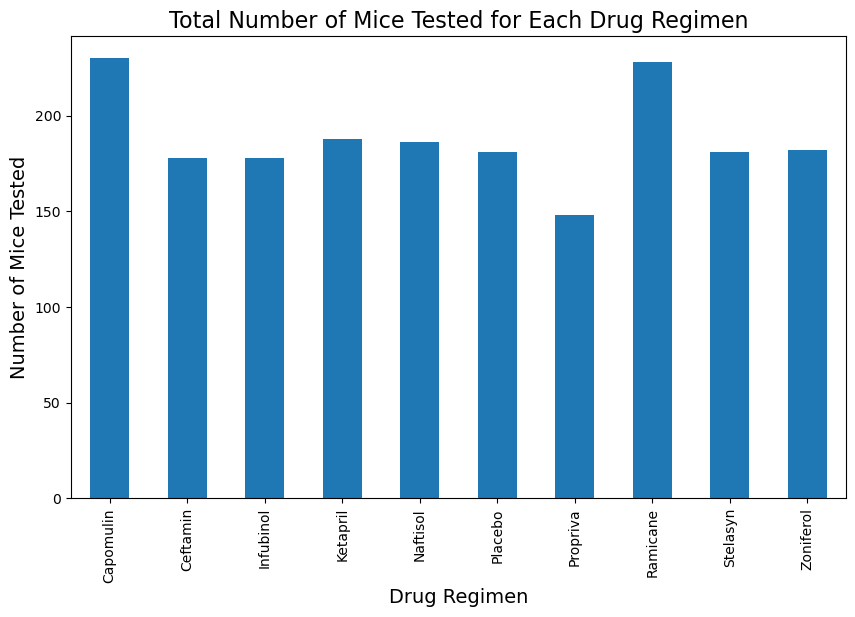

In [12]:
# Use groupby to get the count of timepoints for each drug regimen and create a DataFrame from the result
timepoint_count = pd.DataFrame(clean_df.groupby("Drug Regimen")["Timepoint"].count())

# Create a bar plot using the plot() function on the timepoint_count DataFrame
ax = timepoint_count.plot(kind="bar", legend=False, rot=45, figsize=(10,6))

# Set the title and axes labels
ax.set_title("Total Number of Mice Tested for Each Drug Regimen", fontsize=16)
ax.set_xlabel("Drug Regimen", fontsize=14)
ax.set_ylabel("Number of Mice Tested", fontsize=14)

# Rotate the x-axis labels to be slanted at a 45-degree angle
ax.tick_params(axis="x", rotation=90)

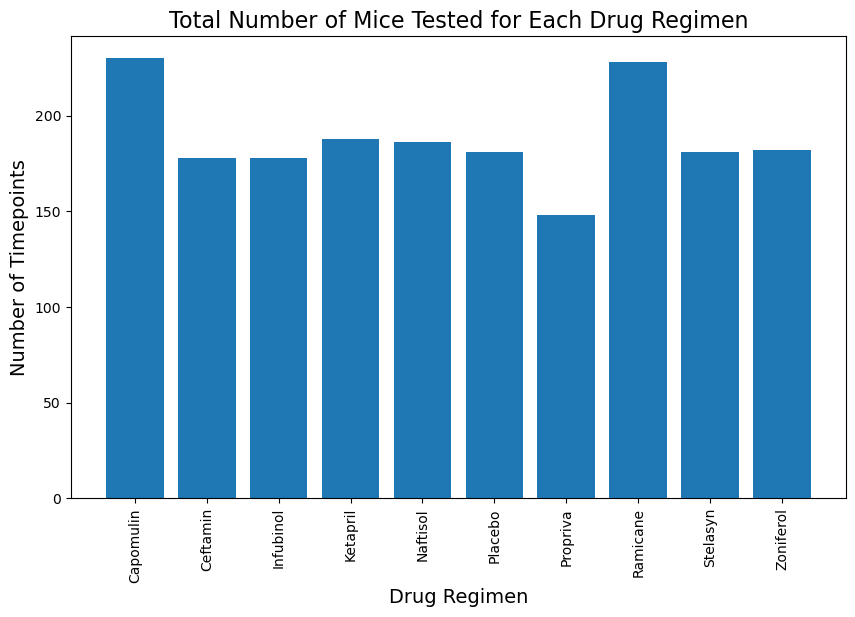

In [13]:
import matplotlib.pyplot as plt

# Use groupby to get the count of timepoints for each drug regimen and create a DataFrame from the result
timepoint_count = pd.DataFrame(clean_df.groupby("Drug Regimen")["Timepoint"].count())

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using the bar() function from Pyplot
plt.bar(timepoint_count.index, timepoint_count["Timepoint"])

# Set the title and axes labels
plt.title("Total Number of Mice Tested for Each Drug Regimen", fontsize=16)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Timepoints", fontsize=14)

# Rotate the x-axis labels to be slanted at a 45-degree angle
plt.xticks(rotation=90)

# Show the plot
plt.show()

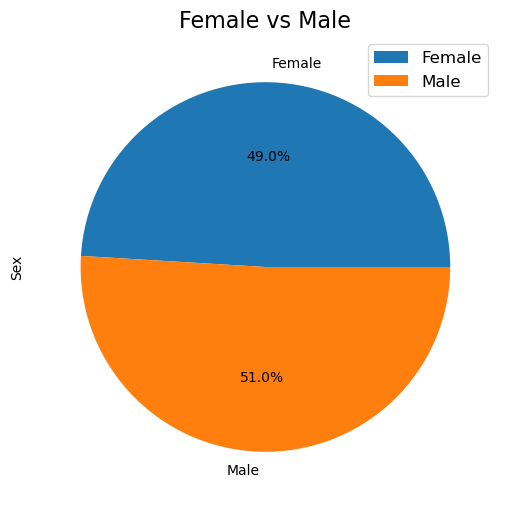

In [14]:
import matplotlib.pyplot as plt

# Use groupby to get the count of male and female mice and create a DataFrame from the result
gender_count = pd.DataFrame(clean_df.groupby("Sex")["Sex"].count())

# Create a pie plot using the plot() function on the gender DataFrame
ax = gender_count.plot(kind="pie", y="Sex", figsize=(6, 6), autopct="%1.1f%%")

# Set the title and legend
ax.set_title("Female vs Male", fontsize=16)
ax.legend(["Female", "Male"], loc="best", fontsize=12)

# Show the plot
plt.show()

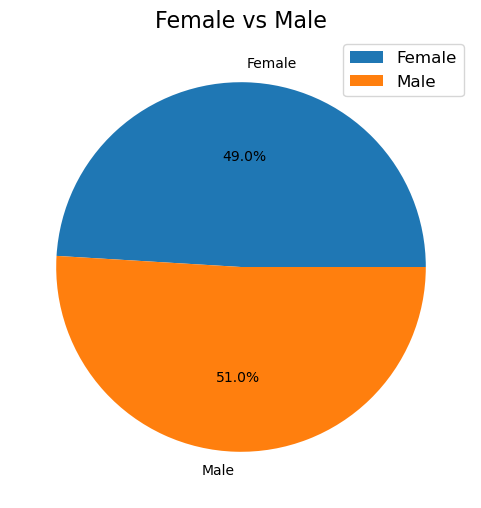

In [15]:
# Use groupby to get the count of male and female mice and create a dictionary from the result
gender_count = clean_df.groupby("Sex")["Sex"].count().to_dict()

# Create a pie plot using the pie() function on the gender_count dictionary
plt.figure(figsize=(6, 6))
plt.pie(gender_count.values(), labels=gender_count.keys(), autopct="%1.1f%%")

# Set the title and legend
plt.title("Female vs Male", fontsize=16)
plt.legend(["Female", "Male"], loc="best", fontsize=12)

# Show the plot
plt.show()

# Quartiles, Outliers and Boxplots

In [16]:
# Create a list of the four treatment regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Use isin() to filter the clean_df DataFrame to only include the four treatments
treatments_df = clean_df[clean_df["Drug Regimen"].isin(treatments)]

# Get the last (greatest) timepoint for each mouse using groupby() and max()
last_timepoint = treatments_df.groupby("Mouse ID")["Timepoint"].max()

# Merge the last_timepoint Series with the treatments_df DataFrame to get the final tumor volume for each mouse
final_tumor_vol = pd.merge(last_timepoint, treatments_df, on=["Mouse ID", "Timepoint"])

# Print the final_tumor_vol DataFrame
print(final_tumor_vol.head())

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a275         45     Ceftamin  Female          20          28   
3     a411         45     Ramicane    Male           3          22   
4     a444         45     Ramicane  Female          10          25   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           62.999356                 3  
3           38.407618                 1  
4           43.047543                 0  


In [17]:


# Create a list of the four treatment regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to hold tumor volume data for each regimen
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add the tumor volume data to the list
    tumor_vol_data.append(tumor_vols)
    
    # Calculate the IQR and print the results
    quartiles = tumor_vols.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"{treatment} IQR: {iqr:.2f}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    outliers = tumor_vols.loc[(tumor_vols < lower_bound) | (tumor_vols > upper_bound)]
    print(f"{treatment} potential outliers: {outliers.tolist()}\n")

Capomulin IQR: 7.78
Capomulin potential outliers: []

Ramicane IQR: 9.10
Ramicane potential outliers: []

Infubinol IQR: 11.48
Infubinol potential outliers: [36.3213458]

Ceftamin IQR: 15.58
Ceftamin potential outliers: []



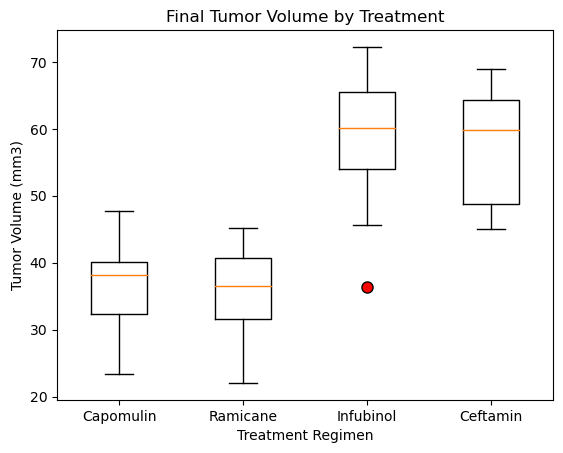

In [18]:
# Create a boxplot for the four treatment regimens and label the outliers
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatments, flierprops={'marker':'o','markersize':8,'markerfacecolor':'red'})
ax.set_title('Final Tumor Volume by Treatment')
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

# Line and Scatter Plots

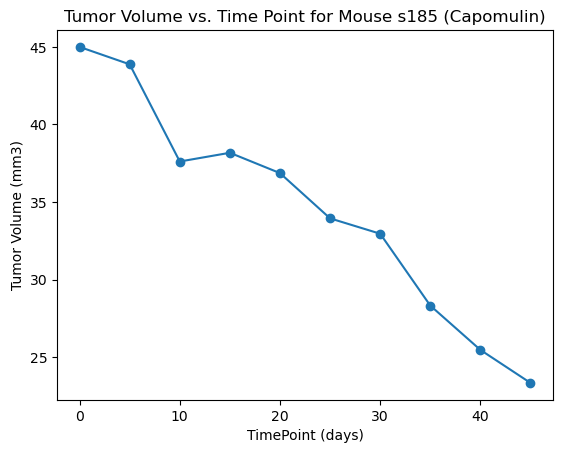

In [19]:
# Select a mouse treated with Capomulin
capomulin_mouse = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()[0]

# Get the tumor volume and timepoint data for the selected mouse
capomulin_data = clean_df.loc[clean_df['Mouse ID'] == capomulin_mouse][['Timepoint', 'Tumor Volume (mm3)']]

# Plot the data as a line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o')
plt.title(f"Tumor Volume vs. Time Point for Mouse {capomulin_mouse} (Capomulin)")
plt.xlabel('TimePoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

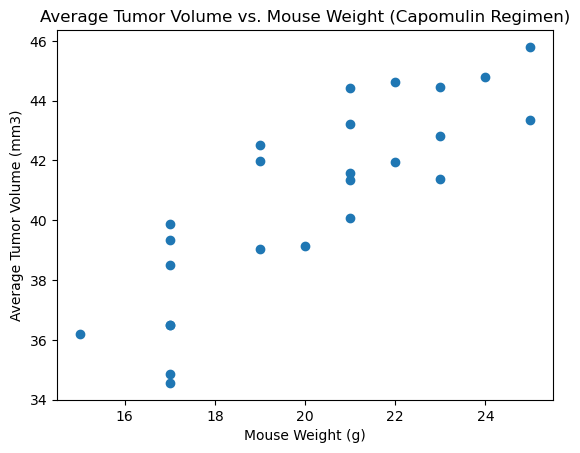

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Filter the clean_df to only include data for the Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and weight for each mouse
avg_tumor_weight = capomulin_df.groupby(['Mouse ID']).mean()[['Tumor Volume (mm3)', 'Weight (g)']]

# Generate a scatter plot of the average tumor volume vs. mouse weight
plt.scatter(avg_tumor_weight['Weight (g)'], avg_tumor_weight['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

# Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


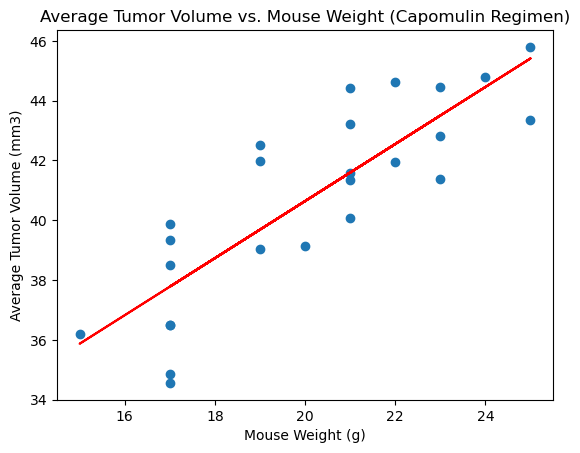

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Filter the clean_df to only include data for the Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and weight for each mouse
avg_tumor_weight = capomulin_df.groupby(['Mouse ID']).mean()[['Tumor Volume (mm3)', 'Weight (g)']]

# Calculate the correlation coefficient
corr_coef = st.pearsonr(avg_tumor_weight['Weight (g)'], avg_tumor_weight['Tumor Volume (mm3)'])[0]
print(f"The correlation coefficient between mouse weight and average tumor volume is {corr_coef:.2f}")

# Calculate the linear regression model
slope, intercept, rvalue, pvalue, stderr = st.linregress(avg_tumor_weight['Weight (g)'], avg_tumor_weight['Tumor Volume (mm3)'])
regress_values = avg_tumor_weight['Weight (g)'] * slope + intercept

# Generate a scatter plot of the average tumor volume vs. mouse weight
plt.scatter(avg_tumor_weight['Weight (g)'], avg_tumor_weight['Tumor Volume (mm3)'])
plt.plot(avg_tumor_weight['Weight (g)'], regress_values, color='red')
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()